# Analysis functions

In [100]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from src.utilities import get_average_curve, time_to_seconds
#Standardized color scheme for plotting
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                               "#312725", '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Importing data

## Invader c/isoC

In [101]:
data_dir = "Data/"
data = pd.read_csv(data_dir + "TUM_NN_Mismatches_RepIsoG.csv", index_col=0)
data

,time,Inv C: Rep G,Inv C : Rep T,Inv C : Rep C,Inv C : Rep A,Inv isoC : Rep G,Inv isoC: Rep T,Inv isoC: Rep C,Inv isoC: Rep A,Inv isoC : Rep isoG
0,0,1.315271,0.197044,0.429392,0.191297,0.157635,0.463875,0.218391,0.151067,3.883279
1,60,1.808703,0.409688,0.166667,0.203612,0.305419,0.401478,0.651067,0.362890,5.669790
2,120,2.389984,0.238095,0.473727,0.239737,0.430213,0.362069,0.165846,0.103448,6.869246
3,180,3.023810,0.236453,0.258621,0.403941,0.169130,0.509852,0.114122,0.200328,7.806100
4,240,3.263547,0.347291,0.454844,0.142036,0.325123,0.642036,0.398194,0.383415,9.173865
...,...,...,...,...,...,...,...,...,...,...
995,59790,19.773399,1.854680,1.538588,1.883415,7.433498,1.753695,2.332512,6.379310,20.297481
996,59850,19.656814,1.981117,1.599343,1.516420,7.587028,1.843186,2.499179,6.625616,19.917265
997,59910,19.931856,2.137931,1.843186,1.737274,7.800493,1.696223,2.420361,6.877668,19.839194
998,59970,19.889163,1.637110,1.600164,2.014778,7.564860,1.713465,2.504105,6.649425,19.924362


## Invader G/isoG

In [102]:
data2 = pd.read_csv(data_dir + "TUM_NN_Mismatches_InvIsoC.csv", index_col=0)
data2

,time,Inv C: Rep G,Inv T: Rep G,Inv G: Rep G,Inv A: Rep G,Inv C: Rep isoG,Inv T: Rep isoG,Inv G: Rep isoG,Inv A: Rep isoG
0,0,0.606594,0.176784,0.211135,0.143270,0.084622,0.211973,0.395459,0.205270
1,90,1.546647,0.214486,0.253027,0.186000,0.177621,0.110594,0.248000,-0.044405
2,180,2.148213,0.040216,0.027649,0.108081,0.468351,0.313351,0.359432,0.080432
3,270,2.450672,0.240459,0.107243,0.385405,0.237108,0.324243,0.217838,0.157513
4,360,3.451887,0.250513,0.243810,0.185162,0.509405,0.208621,0.245486,-0.038540
...,...,...,...,...,...,...,...,...,...
995,89550,20.042730,3.844833,2.103808,1.054836,10.989904,8.545934,8.153827,0.862134
996,89640,19.784676,3.105023,2.203511,1.131917,10.811445,8.221692,8.328935,1.291106
997,89730,19.908676,3.486239,2.216916,1.344728,11.303255,8.331448,8.519124,1.040593
998,89820,20.190189,3.671400,2.080349,1.296133,10.913661,8.292908,8.218340,1.022161


## Raw controls

In [103]:
TUM_controls = pd.read_csv(data_dir + "TUM_controls.csv", index_col=0)
conditions_TUM_controls = {'buffer alone' : ['Buffer_1',	'Buffer_2',	'Buffer_3'],
                          'R alone' : ['R_1',	'R_2',	'R_3'],
                          'R(nn) alone' : ['R(nn)_1',	'R(nn)_2',	'R(nn)_3'],
                          'no background nat' : ['OneStep_1',	'OneStep_2',	'OneStep_3'],
                          'no background nn' : ['OneStep(nn)_1',	'OneStep(nn)_2',	'OneStep(nn)_3']}
offset_TUM_controls = 0
t_TUM_controls = [int(t) for t in TUM_controls['time'].values]
TUM_controls

,time,Buffer_1,Buffer_2,Buffer_3,R_1,R_2,R_3,R(nn)_1,R(nn)_2,R(nn)_3,...,N50-10µM_3,N50-10µM(nn)_1,N50-10µM(nn)_2,N50-10µM(nn)_3,N50-25µM_1,N50-25µM_2,N50-25µM_3,N50-25µM(nn)_1,N50-25µM(nn)_2,N50-25µM(nn)_3
0,0,3727,3824,3880,3867,4059,3817,3977,4233,3863,...,3832,4170,3894,4297,4131,3780,3859,3925,3765,4241
1,60,3914,3692,3869,3888,3770,3646,3883,3927,3751,...,4102,3944,4175,4153,3976,3805,3735,3877,3853,3839
2,120,3700,3756,3734,4016,3980,3756,4161,3990,3760,...,4211,4113,4162,4201,4159,3869,3828,3930,3944,3750
3,180,3771,3776,3741,3845,3918,3668,3895,4086,3785,...,3944,4136,4206,4321,4169,4188,4025,4312,4080,4203
4,240,4021,3593,3350,3627,4087,3804,3974,4299,3975,...,3996,4254,4415,4592,4126,3879,3786,4250,4130,3972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59700,4256,3975,3771,4134,4160,3818,4093,4265,3886,...,9592,16840,15810,17649,6289,5844,5939,11834,12225,13029
996,59760,3978,3601,3935,4000,3917,3888,3859,4350,4045,...,8897,16082,16131,17904,6249,5863,6201,11691,12081,12763
997,59820,4002,3912,4018,4104,4169,3849,3961,4197,3985,...,9133,16652,15984,18037,6259,6161,5856,11730,11810,12890
998,59880,3771,4009,3827,4325,3858,3704,4314,4279,4027,...,8949,16647,15940,18183,6212,5744,6142,11271,11674,12851


# Analysis

In [104]:
df2_data = {"condition" : [],
            "completion" : []}

time_ind = min([i for i,t in enumerate(data['time']) if float(t) >= 60*60*6])

for cond in list(data.columns[1:]):
  df2_data["condition"] += [cond]
  df2_data['completion'] += [float(data[cond].values[time_ind])/20]

time_ind2 = min([i for i,t in enumerate(data2['time']) if float(t) >= 60*60*6])

for cond in list(data2.columns[1:]):
  if cond not in df2_data['condition']:
    df2_data["condition"] += [cond]
    df2_data['completion'] += [float(data2[cond].values[time_ind2])/20]

df2 = pd.DataFrame(df2_data)
df2.sort_values(by=['completion'], ascending=True, inplace=True, ignore_index=True)
df2




,condition,completion
0,Inv A: Rep isoG,0.010389
1,Inv A: Rep G,0.026518
2,Inv C : Rep A,0.037438
3,Inv G: Rep G,0.046919
4,Inv isoC: Rep T,0.058210
5,Inv C : Rep C,0.060920
6,Inv C : Rep T,0.061741
7,Inv T: Rep G,0.067488
8,Inv isoC: Rep C,0.075246
9,Inv isoC: Rep A,0.149015


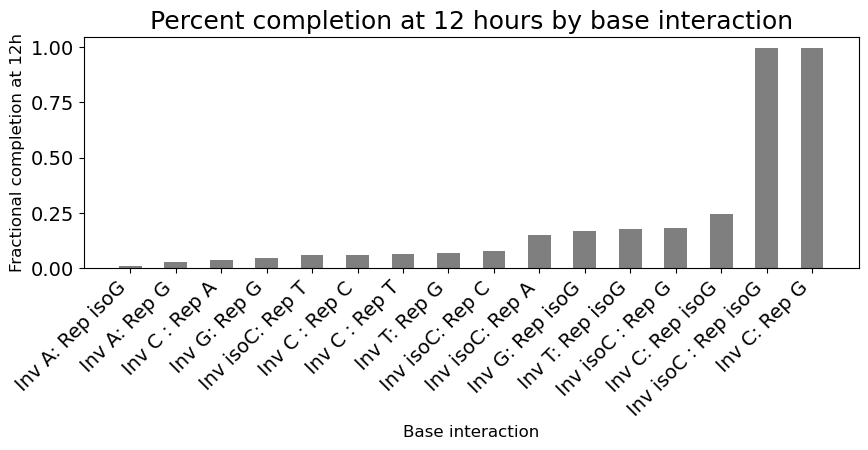

In [105]:
import matplotlib

color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color = color_scheme[-3]

plt.figure(figsize=(10,3))
#plt.scatter(df2['condition'], df2['completion'])
labels = df2['condition']
x = np.arange(len(labels))
dx = 1
bar_width = 0.5
y = df2['completion']
plt.bar(x + dx, y, width=bar_width, color=color)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)


plt.xticks(np.arange(1, len(labels)+1), labels)
plt.tick_params(axis='x')
plt.xticks(rotation=45, ha='right')
plt.title('Percent completion at 12 hours by base interaction', fontsize=18)
plt.xlabel('Base interaction', fontsize=12)
plt.ylabel('Fractional completion at 12h', fontsize=12)
plt.savefig('Figures/NNMismatchesPlot.svg')




# Raw fluoresence for controls

1000 1000
Endpoints percent difference: 4.2


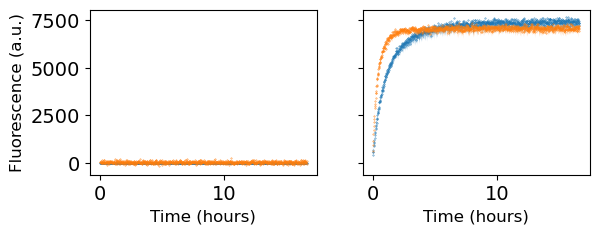

In [123]:
fit_dummy = [0, 2]
t = t_TUM_controls
data = TUM_controls
conditions = conditions_TUM_controls
levels = list(conditions.keys())
fit = fit_dummy
start = time_to_seconds("0:00:00")
x = t_TUM_controls
offset = offset_TUM_controls

curves = []
stdDev = []

print(len(t), len(data['Buffer_1']))

# Plotting results
fig, ax = plt.subplots(1,2, figsize = (6.25,3), sharey=True)
fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.75)

alph = 0.5
size = 0.1
line = 2
for i, level in enumerate(levels[1:3]):
            
      t, y, std = get_average_curve(start, offset, level, x, data, conditions, fit)
      t = np.array(t)/3600  #converting to hours
      y = np.array(y)
      if i == 0:
          base = y
      y = y - base
      std = np.array(std)
      ax[0].scatter(t, y, s=size, color=color_scheme[i], label = level)
      ax[0].fill_between(t,np.array(y), (y - std), (y - std), alpha= alph)


endpoints = []
for i, level in enumerate(levels[3:]):
            
      t, y, std = get_average_curve(start, offset, level, x, data, conditions, fit)
      t = np.array(t)/3600  #converting to hours
      y = np.array(y)
      y = y - base
      std = np.array(std)
      endpoints.append(y[-10:].mean())
      ax[1].scatter(t, y, s=size, color=color_scheme[i], label = level)
      ax[1].fill_between(t,np.array(y), (y - std), (y - std), alpha= alph)

for a in ax:
    a.set_xlabel('Time (hours)', fontsize=12)
ax[0].set_ylabel('Fluorescence (a.u.)', fontsize=12)

print("Endpoints percent difference:", round(100*np.abs(endpoints[1]-endpoints[0])/endpoints[0],1))

plt.savefig("Figures/controls_raw_rfu.svg", dpi = 300)
plt.show()